
Набор данных по цветкам ириса или набор данных по ирисам Фишера - это многомерный набор данных, представленный британским статистиком и биологом Рональдом Фишером в его работе 1936 года «Использование множественных измерений в таксономических проблемах» в качестве примера линейного дискриминантного анализа.

Этот знаменитый набор данных по ирисам содержит измерения в сантиметрах переменных длины и ширины чашелистика и длины и ширины лепестка, соответственно, для 50 цветков каждого из 3 видов ирисов. Эти виды - Iris setosa, versicolor и virginica. На основе комбинации этих четырех признаков Фишер разработал модель для отличия видов друг от друга.

Набор данных содержит 150 записей по 5 признакам.

1. длина чашелистика в см
2. ширина чашелистика в см
3. длина лепестка в см
4. ширина лепестка в см
5. Виды:  
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

Ваша цель на сегодня - научиться отличать их друг от друга

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
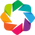

In [ ]:
import holoviews as hv
import seaborn as sns
hv.extension('bokeh', 'matplotlib')

# Подсказки для самостоятельного выполнения

1. Загрузите данные

2. Проведите анализ данных. Нужно ли нормировать данные? Если да, воспользуйтесь StandardScaler()

3. Загрузите KNNClassifier из sklearn. Попробуйте поварьировать значения k и посмотреть как меняется качество

3a. Дополнительно можете посмотреть в документации различные способы считать расстояние между объектами. Постройте границы классов (смотрите пример внизу) для каждого расстояние и сравните границы. Какое расстояние наиболее оптимально использовать?

4. Подумайте, какую метрику качества в данном случае оптимально использовать?

# Данные


Загрузите в колаб файл iris.csv и давайте посмотрим на первые несколько строк

In [ ]:
iris_data = pd.read_csv('iris.csv')

iris_data.columns = ['sepal_length', 'sepal_width' , 'petal_length', 'petal_width', 'species']

iris_data.head(10)


Размер нашего датасета:

In [ ]:
iris_data.shape

(149, 5)

In [ ]:
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
print(iris_data.groupby('species').size())

species
Iris-setosa        49
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Видим, что у нас сбалансированный датасет

Посчитайте минимальные и максимальные значения по каждому из признаков, среднее значение и медиану

In [ ]:
# ваш код

Используя describe функцию и transpose выведите таблицу со всей информацией по каждому из 4 признаков (У вас должна получиться таблица с 4 строками)

In [ ]:
# ваш код

Построим боксплот чтобы посмотреть на наличие выборосов

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="GnBu_d", rc={'figure.figsize':(11.7,8.27)})

title="Распределение длины чашелистика"

sns.boxplot(x="species", y="sepal_length", data=iris_data)

# increasing font size
plt.title(title, fontsize=26)
# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="GnBu_d", rc={'figure.figsize':(11.7,8.27)})

title="Распределение ширины чашелистика"

sns.boxplot(x="species", y="sepal_width", data=iris_data)

# increasing font size
plt.title(title, fontsize=26)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="GnBu_d", rc={'figure.figsize':(11.7,8.27)})

title="Распределение длины лепестков"

sns.boxplot(x="species", y="petal_length", data=iris_data)

# increasing font size
plt.title(title, fontsize=26)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="GnBu_d", rc={'figure.figsize':(11.7,8.27)})

title="Распределение ширины лепестков"

sns.boxplot(x="species", y="petal_width", data=iris_data)

# increasing font size
plt.title(title, fontsize=26)
plt.show()

Что вы видите? Различаются ли эти характеристики у разных видов ирисов?

Теперь сравним лепестки между собой

In [ ]:
from bokeh.plotting import figure, output_file, show
output_file("test1.html")

color1 = '#fcc5c0'
color2 = '#f768a1'
color3 = '#7a0177'

#adding colors
colormap = {'Iris-setosa': color1, 'Iris-versicolor': color2, 'Iris-virginica': color3}
colors = [colormap[x] for x in iris_data['species']]

#adding labels
p = figure(title = "Petal Width and Petal Length")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'
p.legend.location = "top_left"

p.diamond(iris_data["petal_length"], iris_data["petal_width"],color=colors, fill_alpha=0.2, size=10)


show(p)

# Сравним ширину лепестков и длину чашелистика у разных видов

In [ ]:
from bokeh.plotting import figure, output_file, show
output_file("test2.html")

#adding colors
colormap = {'Iris-setosa': color1, 'Iris-versicolor': color2, 'Iris-virginica': color3}
colors = [colormap[x] for x in iris_data['species']]

#adding labels
p = figure(title = "Petal Width and Sepal Length")
p.xaxis.axis_label = 'Sepal Length'
p.yaxis.axis_label = 'Petal Width'


p.circle(iris_data["sepal_length"], iris_data["petal_width"],
         color=colors, fill_alpha=0.2, size=10)


show(p)

# Построим Pairplot
чтобы посмотреть на то как относятся друг к другу различные признаки

In [ ]:

import seaborn as sns
sns.pairplot(iris_data, hue="species", palette="GnBu_d", markers=["o", "s", "D"])

sns.despine()

import matplotlib.pyplot as plt
plt.show()

In [ ]:

import seaborn as sns
sns.set(style="whitegrid")

sns.pairplot(iris_data, hue="species", palette="GnBu_d", diag_kind="kde", markers=["o", "s", "D"])

sns.despine()

import matplotlib.pyplot as plt
plt.show()

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", palette="GnBu_d", rc={'figure.figsize':(11.7,8.27)})

iris2 = pd.melt(iris_data, "species", var_name="measurement")

sns.swarmplot(x="measurement", y="value", hue="species",palette="GnBu_d", data=iris2)

sns.despine()

import matplotlib.pyplot as plt
plt.show()

In [ ]:
import seaborn as sns
sns.set(style="whitegrid", palette="GnBu_d", rc={'figure.figsize':(11.7,8.27)})


sns.violinplot(x="species", y="petal_length", palette="GnBu_d", data=iris_data)
sns.despine()
import matplotlib.pyplot as plt
plt.show()


In [ ]:
import seaborn as sns
sns.set(style="whitegrid", palette="GnBu_d", rc={'figure.figsize':(11.7,8.27)})

sns.violinplot(x="species", y="petal_width", palette="GnBu_d", data=iris_data)
sns.despine()

import matplotlib.pyplot as plt
plt.show()

In [ ]:
import matplotlib.pyplot as plt
iris_data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# KNN

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

Посмотрим на данные еще раз, убедимся что с ними все ок

In [ ]:
print(iris.data)

In [ ]:
# целевые переменные
print(iris.target)

# имена  целевых переменных
print(iris.target_names)

# имена признаков
print(iris.feature_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

In [ ]:
X = iris.data
y = iris.target

print(X.shape)
print(y.shape)
print(np.unique(y))

Загружаем модель KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

# (k = 1)
knn = KNeighborsClassifier(n_neighbors=1)

print(knn)

In [ ]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [ ]:
# Попробуем определить тип ириса у которого
# 3 см x 5 см чашелистик и 4 см x 2 см лепесток?

result = knn.predict([[3, 5, 4, 2]])

print(iris.target_names[result])

In [ ]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap


cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')
plt.show()

Попробуйте поварьировать число K и обучить новые алгоритмы, посмотрев как меняются границы между классами.

Дополнительно нужно посчитать качество классификации - разделите выборку на обучающую и тестовую, и с помощью sklearn.metrics посчитайте качество классификации
```(metrics.accuracy_score(y_test, predictions))```

смотрите ноутбук classification.ipynb для примеров

Дополнительно можно добавлять различные гиперпараметры

Чтобы посмотреть возможные гиперпараметры выделите название класса (в данном случае KNeighborsClassifier) держите мышку на выделении и немного подождите, выскочит окно с документацией со всеми возможными гиперпараметрами

In [ ]:
KNeighborsClassifier()

Object `KNeighborsClassifier` not found.


In [ ]:
example_knn = KNeighborsClassifier(metric='minkowski',
                                   n_neighbors=5,
                                   p=2,
                                   weights='uniform')